In [4]:
# -- PHASE 1: CONFIGURATION --
PARCELLATION_NAME = "Julich-Brain Cytoarchitectonic Atlas (v3.1)"
REGION_NAMES = ["hOc1", "hOc2", "hOc4v", "hOc5", "FG1", "FG2"]
CONNECTIVITY_COHORT = "HCP"
HEMISPHERE = "left"


# -- PHASE 2: INITIALIZATION --
import siibra
import json
import pandas as pd

print(f"🔎 Initializing with parcellation: '{PARCELLATION_NAME}'...")
julich_brain = siibra.parcellations.get(PARCELLATION_NAME)
anatomical_data = {}


# -- PHASE 3: DATA EXTRACTION --
for region_name in REGION_NAMES:
    print(f"\nProcessing region: {region_name} ({HEMISPHERE})...")
    anatomical_data[region_name] = {}
    
    try:
        region_concept = julich_brain.get_region(region_name)

        # ---- 1. Process Connectivity ----
        conn_features = siibra.features.get(region_concept, siibra.features.connectivity.StreamlineCounts, cohort=CONNECTIVITY_COHORT)
        
        if conn_features:
            connectivity_matrix = conn_features[0].data
            correct_key = [r for r in connectivity_matrix.index if region_name in r.name and HEMISPHERE in r.name][0]
            profile_series = connectivity_matrix.loc[correct_key].iloc[0]
            external_connections = profile_series.drop(correct_key).sort_values(ascending=False).head(5)
            
            # FIX for Error #2: Convert Region object keys to simple strings
            anatomical_data[region_name]['connectivity'] = {r.name: v for r, v in external_connections.items()}
            print(f"  ✅ Connectivity processed.")
        else:
            anatomical_data[region_name]['connectivity'] = "Not found"

        # ---- 2. Process Cell Density ----
        density_features = siibra.features.get(region_concept, siibra.features.cellular.CellDensityProfile)
        
        if density_features:
            # FIX for Error #1: Get .data DataFrame and calculate mean of the first column
            density_df = density_features[0].data
            mean_value = density_df.iloc[:, 0].mean()
            
            anatomical_data[region_name]['cell_density'] = f"{mean_value:.2f}"
            print(f"  ✅ Cell density processed.")
        else:
            anatomical_data[region_name]['cell_density'] = "Not found"

    except Exception as e:
        print(f"  ❌ An error occurred for region '{region_name}': {e}")
        anatomical_data[region_name]['error'] = str(e)


# -- PHASE 4: FINAL OUTPUT --
print("\n\n🎉 --- Complete Human Anatomical Blueprint --- 🎉")
print(json.dumps(anatomical_data, indent=4))

🔎 Initializing with parcellation: 'Julich-Brain Cytoarchitectonic Atlas (v3.1)'...

Processing region: hOc1 (left)...


Matching StreamlineCounts to Area hOc1 (V1, 17, CalcS): 100%|█| 1221/1221 [00:00
[siibra:INFO] CompoundFeature.data averages the data of each element.
Averaging 272 connectivity matrices: 100%|████| 272/272 [00:16<00:00, 16.51it/s]


  ✅ Connectivity processed.


Matching CellDensityProfile to Area hOc1 (V1, 17, CalcS): 100%|█| 122/122 [00:00
[siibra:INFO] CompoundFeature.data averages the data of each element.
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calcula

  ✅ Cell density processed.

Processing region: hOc2 (left)...


Matching StreamlineCounts to Area hOc2 (V2, 18): 100%|█| 1221/1221 [00:00<00:00,
[siibra:INFO] CompoundFeature.data averages the data of each element.
Averaging 272 connectivity matrices: 100%|████| 272/272 [00:16<00:00, 16.65it/s]


  ✅ Connectivity processed.


Matching CellDensityProfile to Area hOc2 (V2, 18): 100%|█| 122/122 [00:00<00:00,
[siibra:INFO] CompoundFeature.data averages the data of each element.
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...


  ✅ Cell density processed.

Processing region: hOc4v (left)...


Matching StreamlineCounts to Area hOc4v (LingG): 100%|█| 1221/1221 [00:00<00:00,
[siibra:INFO] CompoundFeature.data averages the data of each element.
Averaging 272 connectivity matrices: 100%|████| 272/272 [00:16<00:00, 16.77it/s]


  ✅ Connectivity processed.


Matching CellDensityProfile to Area hOc4v (LingG): 100%|█| 122/122 [00:00<00:00,



Processing region: hOc5 (left)...


Matching StreamlineCounts to Area hOc5 (LOC): 100%|█| 1221/1221 [00:00<00:00, 39
[siibra:INFO] CompoundFeature.data averages the data of each element.
Averaging 272 connectivity matrices: 100%|████| 272/272 [00:16<00:00, 16.72it/s]


  ✅ Connectivity processed.


Matching CellDensityProfile to Area hOc5 (LOC): 100%|█| 122/122 [00:00<00:00, 34
[siibra:INFO] CompoundFeature.data averages the data of each element.
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...


  ✅ Cell density processed.

Processing region: FG1 (left)...


Matching StreamlineCounts to Area FG1 (FusG): 100%|█| 1221/1221 [00:00<00:00, 40
[siibra:INFO] CompoundFeature.data averages the data of each element.
Averaging 272 connectivity matrices: 100%|████| 272/272 [00:16<00:00, 16.83it/s]


  ✅ Connectivity processed.


Matching CellDensityProfile to Area FG1 (FusG): 100%|█| 122/122 [00:00<00:00, 33
[siibra:INFO] CompoundFeature.data averages the data of each element.
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...
[siibra:INFO] Calculating cell densities from cell and layer data...


  ✅ Cell density processed.

Processing region: FG2 (left)...


Matching StreamlineCounts to Area FG2 (FusG): 100%|█| 1221/1221 [00:00<00:00, 40
[siibra:INFO] CompoundFeature.data averages the data of each element.
Averaging 272 connectivity matrices: 100%|████| 272/272 [00:16<00:00, 16.71it/s]


  ✅ Connectivity processed.


Matching CellDensityProfile to Area FG2 (FusG): 100%|█| 122/122 [00:00<00:00, 29



🎉 --- Complete Human Anatomical Blueprint --- 🎉
{
    "hOc1": {
        "connectivity": {
            "Area hOc3v (LingG) left": 35125.04044117647,
            "Area hOc2 (V2, 18) left": 28349.60661764706,
            "Area hOc3d (Cuneus) left": 22377.98161764706,
            "Frontal-to-Occipital (GapMap) left": 18723.5,
            "Area hOc4v (LingG) left": 8105.621323529412
        },
        "cell_density": "84.90"
    },
    "hOc2": {
        "connectivity": {
            "Area hOc1 (V1, 17, CalcS) left": 28349.60661764706,
            "Area hOc3d (Cuneus) left": 14656.661764705883,
            "Area hOc3v (LingG) left": 2529.2904411764707,
            "Frontal-to-Occipital (GapMap) left": 1667.5330882352941,
            "Area hOc4lp (LOC) left": 1575.9779411764705
        },
        "cell_density": "80.67"
    },
    "hOc4v": {
        "connectivity": {
            "Area hOc3v (LingG) left": 21455.40073529412,
            "Area hOc1 (V1, 17, CalcS) left": 8105.621323529412,
  

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F

# Re-define the model class here or import it
class HumanVisualSystem(nn.Module):
    def __init__(self):
        super(HumanVisualSystem, self).__init__()
        # Using the architecture we finalized
        self.v1 = nn.Conv2d(1, 85, 3, padding=1)
        self.v2 = nn.Conv2d(85, 80, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.ventral_v4 = nn.Conv2d(80, 64, 3, padding=1)
        self.ventral_it = nn.Conv2d(64, 65, 3, padding=1)
        self.dorsal_mt = nn.Conv2d(80, 60, 3, padding=1)
        self.v4_to_mt_crosstalk = nn.Conv2d(64, 60, 1)
        self.ventral_classifier = nn.Linear(12740, 10)
        self.dorsal_classifier = nn.Linear(11760, 10)

    def forward(self, x):
        # Early processing
        x = F.relu(self.v1(x))
        x = F.relu(self.v2(x))
        x = self.pool(x)

        # --- Ventral Stream ---
        # 1. Get the output of the V4 layer and save it
        v4_output = F.relu(self.ventral_v4(x))
        
        # 2. Now, continue the ventral stream using the v4_output
        it_output = F.relu(self.ventral_it(v4_output))
        it_output_flat = it_output.view(it_output.size(0), -1)
        ventral_prediction = self.ventral_classifier(it_output_flat)

        # --- Dorsal Stream ---
        d_out = F.relu(self.dorsal_mt(x))
        
        # 3. Implement Crosstalk using the saved v4_output (which has the correct 64 channels)
        v4_to_dorsal_signal = F.relu(self.v4_to_mt_crosstalk(v4_output))
        d_out = d_out + v4_to_dorsal_signal
        
        d_out_flat = d_out.view(d_out.size(0), -1)
        dorsal_prediction = self.dorsal_classifier(d_out_flat)
        
        final_prediction = (ventral_prediction + dorsal_prediction) / 2
        return final_prediction

# ---- 1. SETUP ----
# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
use_subset = True 
if use_subset:
    print("--- Using a smaller subset of data for faster testing ---")
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    # Use only the first 6000 training images
    train_dataset = torch.utils.data.Subset(train_dataset, range(6000))
    
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
    # Use only the first 1000 test images
    test_dataset = torch.utils.data.Subset(test_dataset, range(1000))
else:
    print("--- Using the full dataset ---")
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# ---- 2. INITIALIZE MODEL, LOSS, and OPTIMIZER ----
model = HumanVisualSystem().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ---- 3. TRAINING LOOP WITH PROGRESS TRACKING ----
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Starting Epoch [{epoch+1}/{num_epochs}]...")
    model.train()
    running_loss = 0.0
    # Add enumerate to get the batch index 'i'
    for i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # NEW: Print progress every 100 batches
        if (i + 1) % 100 == 0:
            print(f'  Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 100:.4f}')
            # Reset the running loss after printing
            running_loss = 0.0

    # --- Validation Phase ---
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    print(f'--> Epoch [{epoch+1}/{num_epochs}] finished. Accuracy on test set: {100 * correct / total:.2f} %\n')

print("\n🎉 Finished Training!")


Using device: cpu
--- Using a smaller subset of data for faster testing ---
Starting Epoch [1/5]...
--> Epoch [1/5] finished. Accuracy on test set: 82.70 %

Starting Epoch [2/5]...
--> Epoch [2/5] finished. Accuracy on test set: 86.60 %

Starting Epoch [3/5]...
--> Epoch [3/5] finished. Accuracy on test set: 87.00 %

Starting Epoch [4/5]...
--> Epoch [4/5] finished. Accuracy on test set: 88.70 %

Starting Epoch [5/5]...
--> Epoch [5/5] finished. Accuracy on test set: 87.70 %


🎉 Finished Training!


Activations extracted for layers: ['v1', 'v2', 'v4', 'it', 'mt']

--- Starting RSA ---


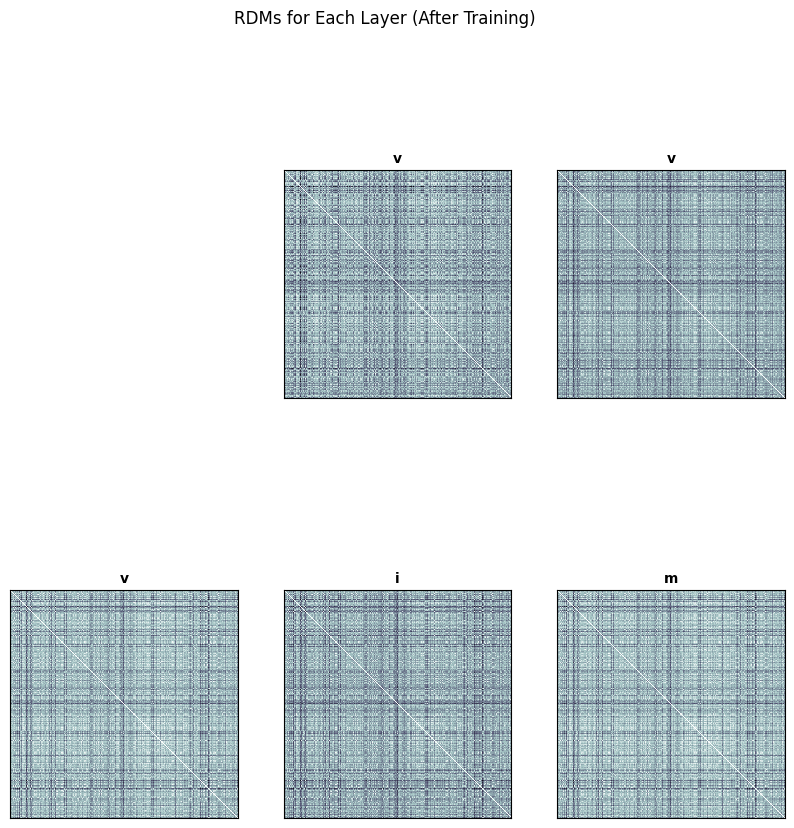

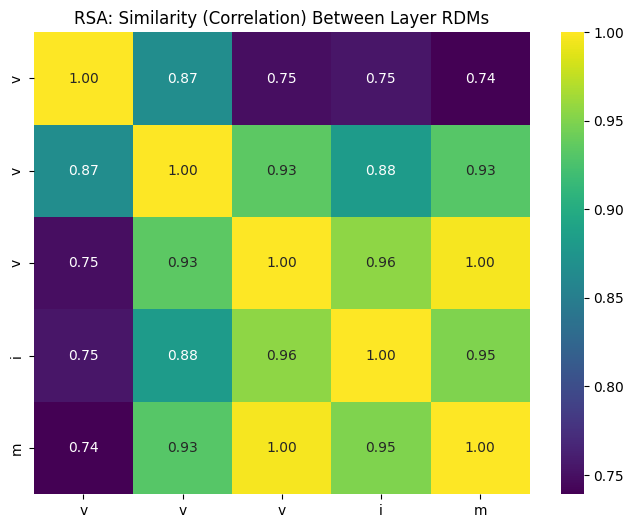


--- Measuring Functional Connectivity ---
Calculating FC before training...
Calculating FC after training...


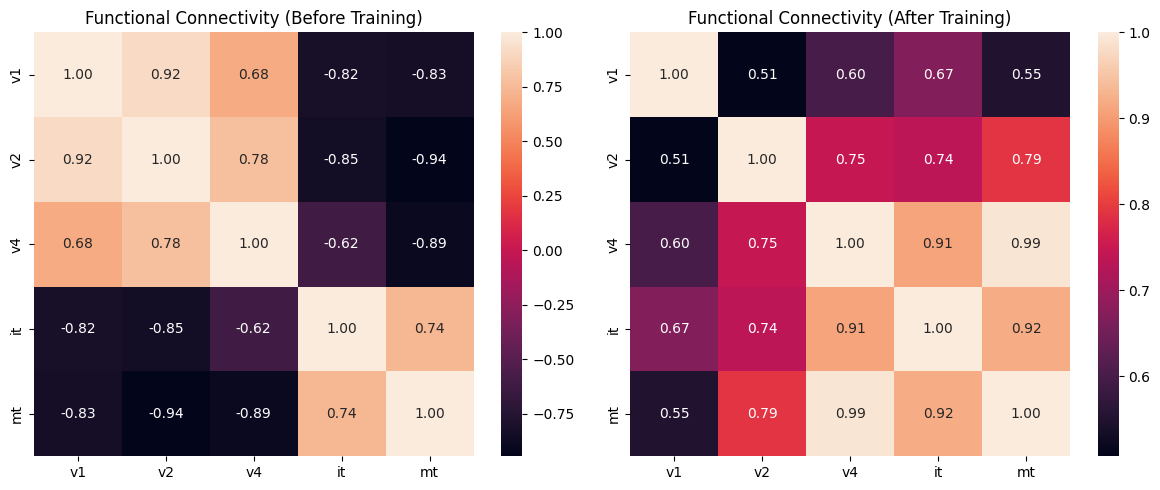

In [9]:
import torch
import rsatoolbox
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the model is in evaluation mode
model.eval()

# Use the test_loader to get a consistent batch of data for analysis
# We'll use just one batch for simplicity
analysis_images, analysis_labels = next(iter(test_loader))
analysis_images, analysis_labels = analysis_images.to(device), analysis_labels.to(device)

# --- 1. Extracting Layer Activations ---

activations = {}
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

# Define the layers we want to analyze
layers_to_analyze = {
    'v1': model.v1,
    'v2': model.v2,
    'v4': model.ventral_v4,
    'it': model.ventral_it,
    'mt': model.dorsal_mt
}

# Register a forward hook for each layer
for name, layer in layers_to_analyze.items():
    layer.register_forward_hook(get_activation(name))

# Pass the data through the model to trigger the hooks
with torch.no_grad():
    output = model(analysis_images)

print(f"Activations extracted for layers: {list(activations.keys())}")


# --- 2. Representational Similarity Analysis (RSA) ---
# This follows the approach from practical_part_three to calculate RDMs
# and practical_part_two to compare them.

print("\n--- Starting RSA ---")
layer_rdms = []
for name, activation in activations.items():
    # We need to flatten the spatial dimensions (height, width) for RSA
    # Shape becomes [n_images, n_channels * height * width]
    measurements = activation.view(activation.shape[0], -1).cpu().numpy()
    
    # Create an rsatoolbox dataset object
    dataset = rsatoolbox.data.Dataset(
        measurements=measurements,
        obs_descriptors={'class': analysis_labels.cpu().numpy()}
    )
    
    # Calculate the RDM using Euclidean distance
    rdm = rsatoolbox.rdm.calc_rdm(dataset, method='euclidean')
    rdm.rdm_descriptors['layer_name'] = name
    layer_rdms.append(rdm)

# Combine all RDMs into a single object for comparison
all_rdms = rsatoolbox.rdm.concat(layer_rdms)

# Visualize the RDM for each layer
fig, ax, ret_val = rsatoolbox.vis.show_rdm(all_rdms, rdm_descriptor='layer_name', figsize=(10,10))
plt.suptitle('RDMs for Each Layer (After Training)')
plt.show()

# The .compare() function returns a plain numpy array
# The .compare() function returns a plain 5x5 numpy array
comparison_array = rsatoolbox.rdm.compare(all_rdms, all_rdms, method='corr')

# Get the layer names from our RDM object to use as labels
layer_names = all_rdms.rdm_descriptors['layer_name']

# FIX: Use seaborn's heatmap function for a clear visualization
plt.figure(figsize=(8, 6))
sns.heatmap(
    comparison_array,
    annot=True,          # This shows the correlation values on the plot
    fmt=".2f",           # Format the numbers to two decimal places
    xticklabels=layer_names,
    yticklabels=layer_names,
    cmap='viridis'       # You can choose different color maps
)
plt.title('RSA: Similarity (Correlation) Between Layer RDMs')
plt.show()


# --- 3. Functional Connectivity ---

print("\n--- Measuring Functional Connectivity ---")

def calculate_fc(activation_dict):
    # This helper function is correct and doesn't need changes.
    mean_activations = []
    layer_names = []
    for name, activation in activation_dict.items():
        mean_act = activation.mean(dim=tuple(range(1, activation.ndim)))
        mean_activations.append(mean_act.cpu().numpy())
        layer_names.append(name)
    activity_matrix = np.vstack(mean_activations)
    fc_matrix = np.corrcoef(activity_matrix)
    return fc_matrix, layer_names

# --- FC Before Training ---
print("Calculating FC before training...")
untrained_model = HumanVisualSystem().to(device)
untrained_model.eval()

# FIX: Define the layers to analyze for the NEW untrained model instance
untrained_layers_to_analyze = {
    'v1': untrained_model.v1, 'v2': untrained_model.v2, 'v4': untrained_model.ventral_v4,
    'it': untrained_model.ventral_it, 'mt': untrained_model.dorsal_mt
}
activations = {}  # Reset the activations dictionary

# FIX: Register the hooks on the layers of the UNTRAINED model
for name, layer in untrained_layers_to_analyze.items():
    layer.register_forward_hook(get_activation(name))

# Now, running the forward pass will correctly capture the activations
with torch.no_grad():
    untrained_model(analysis_images)
fc_before, layer_names = calculate_fc(activations)


# --- FC After Training ---
print("Calculating FC after training...")
model.eval()
activations = {}  # Reset the activations dictionary again

# The hooks should still be on the trained model from the RSA part,
# but we can re-register them here just to be safe and explicit.
for name, layer in layers_to_analyze.items():
    layer.register_forward_hook(get_activation(name))

# Run the forward pass on the TRAINED model
with torch.no_grad():
    model(analysis_images)
fc_after, _ = calculate_fc(activations)

# --- Plotting the FC matrices (this part is unchanged) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(fc_before, ax=axes[0], annot=True, fmt=".2f", xticklabels=layer_names, yticklabels=layer_names)
axes[0].set_title('Functional Connectivity (Before Training)')

sns.heatmap(fc_after, ax=axes[1], annot=True, fmt=".2f", xticklabels=layer_names, yticklabels=layer_names)
axes[1].set_title('Functional Connectivity (After Training)')
plt.tight_layout()
plt.show()


--- Generating t-SNE Visualization ---
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 1000 samples in 0.388s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 29.038568
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.005924
[t-SNE] KL divergence after 300 iterations: 0.903069


/var/folders/mb/77k0vkw17p78r328db1wmk0r0000gn/T/ipykernel_12085/2491778725.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap("jet", 10))


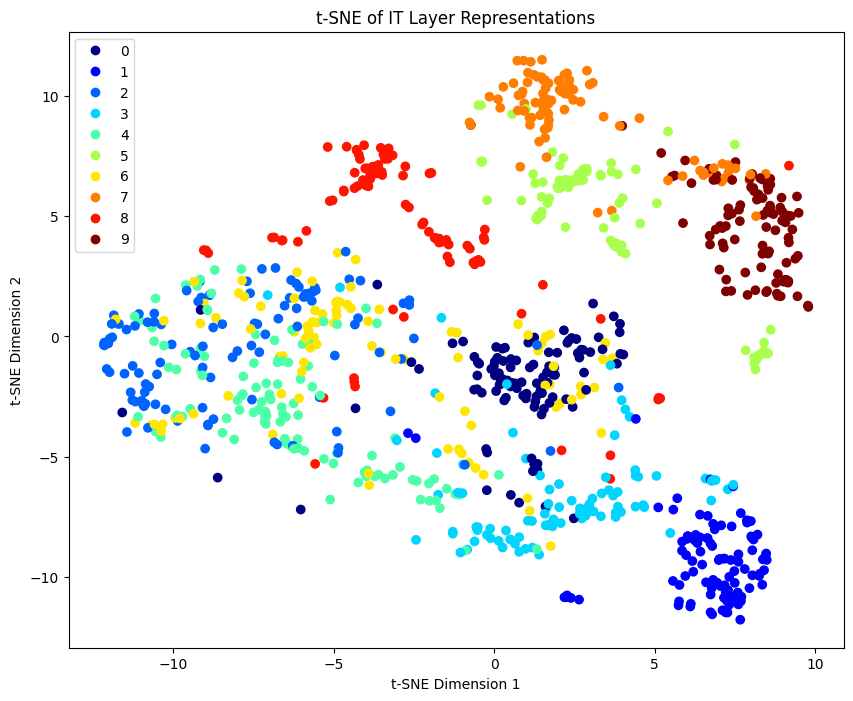

In [10]:
# --- 4. t-SNE Visualization ---

print("\n--- Generating t-SNE Visualization ---")
# Let's visualize the final layer of the ventral stream (IT)
it_activations_flat = activations['it'].view(activations['it'].shape[0], -1).cpu().numpy()
labels = analysis_labels.cpu().numpy()

# Initialize and run t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(it_activations_flat)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels, cmap=plt.cm.get_cmap("jet", 10))
plt.title('t-SNE of IT Layer Representations')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(handles=scatter.legend_elements()[0], labels=list(range(10)))
plt.show()

